### Massive MIMO BTSLog

---
**环境**：
- Python 3.6

**功能**
- 从BTSLog中提取Calibration，Beamforming相关信息

**历史**
- 0.01: 2018/03/10

In [1]:
import os
import re
import glob
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# BTSLog所在文件路径
file_path = r"D:\userdata\anliu\Desktop"
file_name = "SYSLOG_360.LOG"

# 切换到BTSLog所在路径
try:
    os.chdir(file_path)
except:
    print("The folder does not existed!")
    

In [2]:
rc_column = ['FSP','Time','SFN','Slot','Sym','cellIndex','antennaIndex','TimeOffet','antPhaseOff','antAmpRatio','final',
             'smtTO','smtPhase']
tc_column = ['FSP','Time','SFN','Slot','Sym','cellIndex','caliSetIdx', 'AntIdx', 'TimeOff','antPhaseOff','AmpRatio',
             'smtTO','smtPhase', 'Ep/No']

rc_pattern = r'FSP\-(\d+).*T(\d+\:\d+\:\d+\.\d+).*INF/ULPHY/CALIB#, RC:SFN:(\d+),Slot:(\d+),Sym:(\d+),cellIndex=(\d+),'\
             r'antennaIndex=(\d+),TimeOffet=(-?\d+),antPhaseOff=(-?\d+\.?\d+),antAmpRatio=(-?\d+\.\d+),final=(-?\d+\.?\d+),'\
             r'smtTO=(-?\d+),smtPhase=(-?\d+\.?\d+),g_rxCaliScaling.*' 

tc_pattern = r'FSP\-(\d+).*T(\d+\:\d+\:\d+\.\d+).*INF/ULPHY/CALIB#, TC:SFN:(\d+),Slot:(\d+),Sym:(\d+),cellIndex=(\d+),'\
             r'caliSetIdx (\d+),AntIdx\((\d+)\):TimeOff=(-?\d+),antPhaseOff=(-?\d+\.?\d+),AmpRatio=(-?\d+\.\d+),'\
             r'smtTO=(-?\d+),smtPhase=(-?\d+\.?\d+),Ep/No\(dB\)\(peak\)=(\d+\.\d+).*'


# 读取文件返回文件每一行
def lines(file):
    for line in file:
        yield line

# 从BTSLog提取Calibration数据
def fetch_calibration(file_name):
    rc_data = []
    tc_data = []    
    with open(file_name) as file:
        for line in lines(file):
            rc = re.findall(rc_pattern, line)
            if rc:
                rc_data.append(rc[0])        
            tc = re.findall(tc_pattern, line)
            if tc:
                tc_data.append(tc[0]) 

    return rc_data, tc_data

# 整理calibration数据
def convert_caliData(rc_data, tc_data):
    rc_df = pd.DataFrame(rc_data, columns=rc_column, dtype='float32')
    tc_df = pd.DataFrame(tc_data, columns=tc_column, dtype='float32')   
    rc_df[['FSP','SFN','Slot','Sym','cellIndex','antennaIndex']] = rc_df[['FSP','SFN','Slot','Sym','cellIndex','antennaIndex']].astype('int32').astype('str')
    tc_df[['FSP','SFN','Slot','Sym','cellIndex','caliSetIdx','AntIdx']] = tc_df[['FSP','SFN','Slot','Sym','cellIndex','caliSetIdx','AntIdx']].astype('int32').astype('str')
    
    return rc_df, tc_df

In [3]:
rc_data, tc_data = fetch_calibration(file_name)
rc_df, tc_df = convert_caliData(rc_data, tc_data)

In [9]:
print('RC Calibration Data:')
print(rc_df.head())
print('='*100)
print('TC Calibration Data:')
print(tc_df.head())

RC Calibration Data:
    FSP             Time  SFN Slot Sym cellIndex antennaIndex  TimeOffet  \
0  1367  05:46:19.164415  484    3   3         0            0     -362.0   
1  1367  05:46:19.164447  484    3   3         0            1     -327.0   
2  1367  05:46:19.164478  484    3   3         0            2     -483.0   
3  1367  05:46:19.164507  484    3   3         0            3     -499.0   
4  1337  05:46:19.164413  484    3   3         0            0     -349.0   

   antPhaseOff  antAmpRatio   final  smtTO    smtPhase  
0   177.750000       0.7692  0.7692 -359.0  177.679993  
1  -137.169998       0.7850  0.7850 -327.0 -136.960007  
2    43.720001       0.8608  0.8608 -467.0   43.320000  
3    54.759998       0.7708  0.7708 -495.0   55.029999  
4   142.509995       0.7536  0.7536 -343.0  142.600006  
TC Calibration Data:
    FSP             Time     SFN Slot Sym cellIndex caliSetIdx AntIdx  \
0  1367  05:46:18.982609  383442    3   3         0          4      0   
1  1367  05:4

In [4]:
print(rc_df.describe())
print(tc_df.describe())

          TimeOffet   antPhaseOff   antAmpRatio         final         smtTO  \
count  10512.000000  10512.000000  10512.000000  10512.000000  10512.000000   
mean   -1087.470947     17.390308      0.792707      0.794307  -1087.457153   
std     1062.579590    101.190155      0.055584      0.052252   1062.596436   
min    -2565.000000   -173.899994      0.610200      0.708000  -2552.000000   
25%    -2142.000000    -81.290001      0.766775      0.766775  -2148.000000   
50%     -470.000000     22.595000      0.788300      0.788300   -470.000000   
75%      -12.000000    109.930000      0.807700      0.807700     -9.000000   
max      146.000000    179.000000      1.000000      1.000000    133.000000   

           smtPhase  
count  10512.000000  
mean      17.386335  
std      101.188393  
min     -173.839996  
25%      -81.379997  
50%       22.440001  
75%      109.932501  
max      178.419998  
            TimeOff   antPhaseOff      AmpRatio         smtTO      smtPhase  \
count  1339

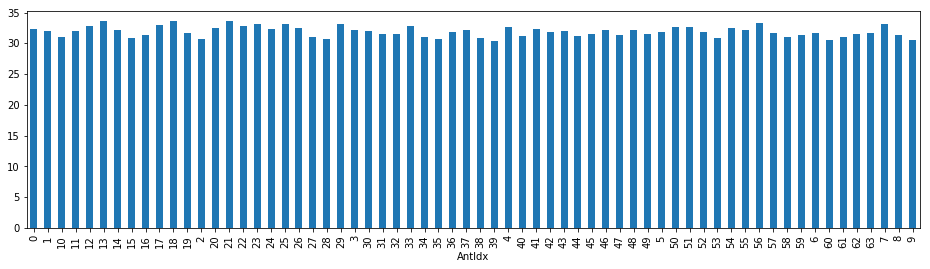

In [7]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax = tc_df.groupby('AntIdx')['Ep/No'].mean().plot(kind='bar')
plt.show()

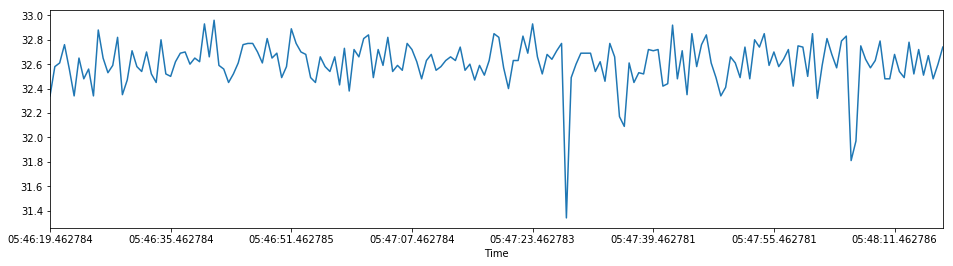

In [22]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax = tc_df[tc_df['AntIdx']=='4'].groupby('Time')['Ep/No'].mean().plot()
plt.show()